In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

from PIL import Image, ImageEnhance
import torchvision.transforms as transforms

import os
from tqdm import tqdm 

In [2]:
dir_train = '/home/ubuntu/train/'

# Load metadata

In [3]:
# train-val split 
M = pd.read_csv('train_metadata.csv')
V = pd.read_csv('val_metadata.csv')
decode = np.load('decode.npy')[()]

# Resize val. images

In [4]:
val_transform = transforms.Compose([
    transforms.Scale(224, Image.LANCZOS),
    transforms.CenterCrop(224)
])

In [5]:
val_size = len(V)
val_size

5120

In [6]:
val_images = np.zeros((val_size, 224, 224, 3), dtype='uint8')
val_targets = np.zeros((val_size,), dtype='int64')

In [7]:
# resize RGB images
for i, row in tqdm(V.loc[V.channels == 3].iterrows()):
    # get image
    file_path = os.path.join(dir_train, row.directory, row.img_name)
    image = Image.open(file_path)
    
    # transform it
    image = val_transform(image)
    
    # convert to array
    array = np.asarray(image, dtype='uint8')
    
    val_images[i] = array
    val_targets[i] = row.category_number

5033it [00:41, 122.23it/s]


In [8]:
# resize grayscale images
for i, row in tqdm(V.loc[V.channels == 1].iterrows()):
    file_path = os.path.join(dir_train, row.directory, row.img_name)
    image = Image.open(file_path)
    image = val_transform(image)
    array = np.asarray(image, dtype='uint8')
    # convert to RGB
    array = np.stack([array, array, array], axis=2)
    val_images[i] = array
    val_targets[i] = row.category_number

87it [00:00, 272.86it/s]


# Show some resized images

In [9]:
# choose random images
to_show = np.random.choice(np.arange(0, val_size), size=4*5, replace=False)

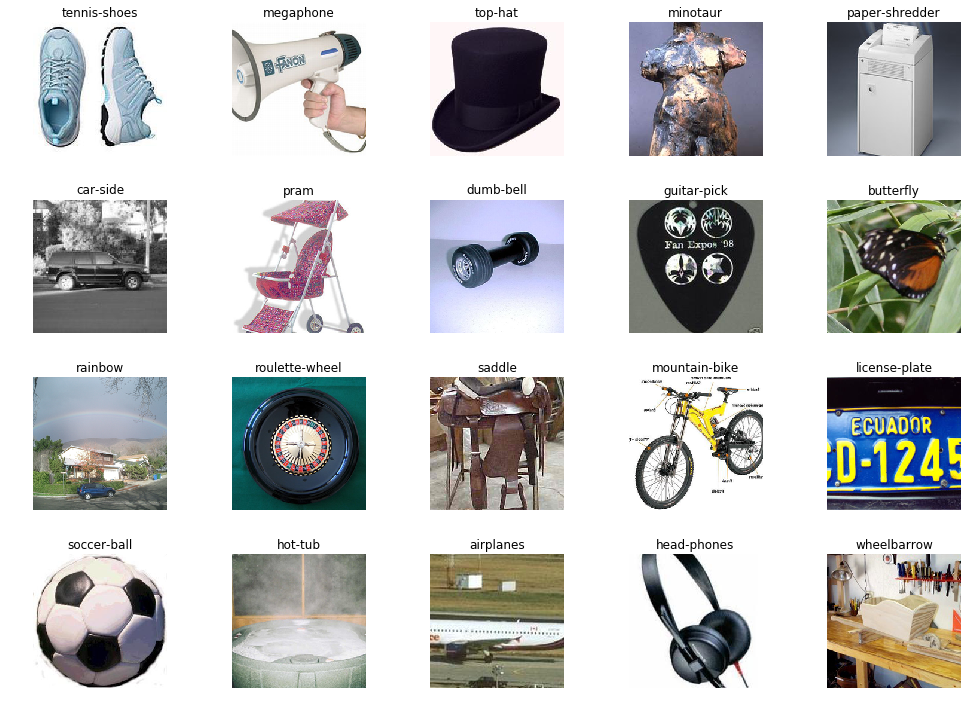

In [10]:
_, axes = plt.subplots(nrows=4, ncols=5, figsize=(14, 10))
axes = axes.flatten()
for i, j in enumerate(to_show):
    axes[i].set_axis_off();
    axes[i].imshow(val_images[j]/255);
    axes[i].set_title(decode[val_targets[j]]);
plt.tight_layout()

# Explore imbalanced classes

In [ ]:
M.category_name.value_counts()

# Resize train images

In [ ]:
# http://pillow.readthedocs.io/en/4.2.x/reference/ImageEnhance.html
def enhance(image):
    pass

In [11]:
train_transform = transforms.Compose([
    transforms.Scale(256, Image.LANCZOS),
    transforms.RandomCrop(224),
    transforms.RandomHorizontalFlip(),
    transforms.Lambda(enhance)
])

In [12]:
M = M.groupby('category_name', group_keys=False).apply(lambda x: x.sample(n=200, replace=True))
M.reset_index(drop=True, inplace=True)

In [13]:
train_size = len(M)
train_size

51200

In [14]:
train_images = np.zeros((train_size, 224, 224, 3), dtype='uint8')
train_targets = np.zeros((train_size,), dtype='int64')

In [15]:
# resize RGB images
for i, row in tqdm(M.loc[M.channels == 3].iterrows()):
    # get image
    file_path = os.path.join(dir_train, row.directory, row.img_name)
    image = Image.open(file_path)
    
    # transform it
    image = val_transform(image)
    
    # convert to array
    array = np.asarray(image, dtype='uint8')
    
    train_images[i] = array
    train_targets[i] = row.category_number

50523it [06:38, 126.65it/s]


In [16]:
# resize grayscale images
for i, row in tqdm(M.loc[M.channels == 1].iterrows()):
    file_path = os.path.join(dir_train, row.directory, row.img_name)
    image = Image.open(file_path)
    image = val_transform(image)
    array = np.asarray(image, dtype='uint8')
    # convert to RGB
    array = np.stack([array, array, array], axis=2)
    train_images[i] = array
    train_targets[i] = row.category_number

677it [00:03, 211.22it/s]


# Show some resized images

In [17]:
# choose random images
to_show = np.random.choice(np.arange(0, train_size), size=4*5, replace=False)

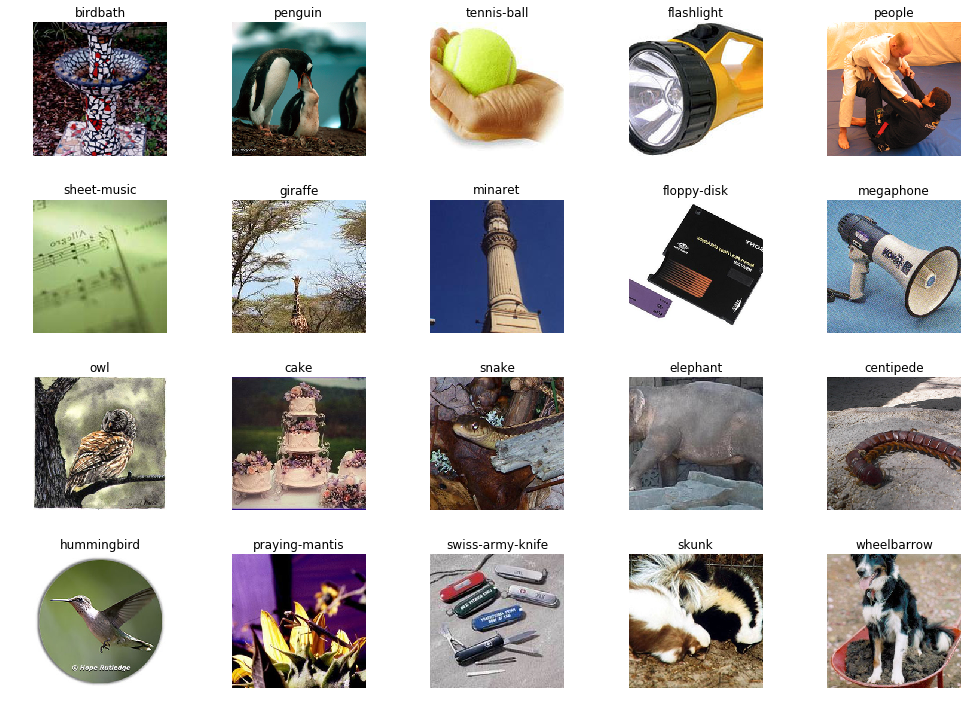

In [18]:
_, axes = plt.subplots(nrows=4, ncols=5, figsize=(14, 10))
axes = axes.flatten()
for i, j in enumerate(to_show):
    axes[i].set_axis_off();
    axes[i].imshow(train_images[j]/255);
    axes[i].set_title(decode[train_targets[j]]);
plt.tight_layout()

In [19]:
gray_indices = M.loc[M.channels == 1].index
to_show = np.random.choice(gray_indices, size=2*4)

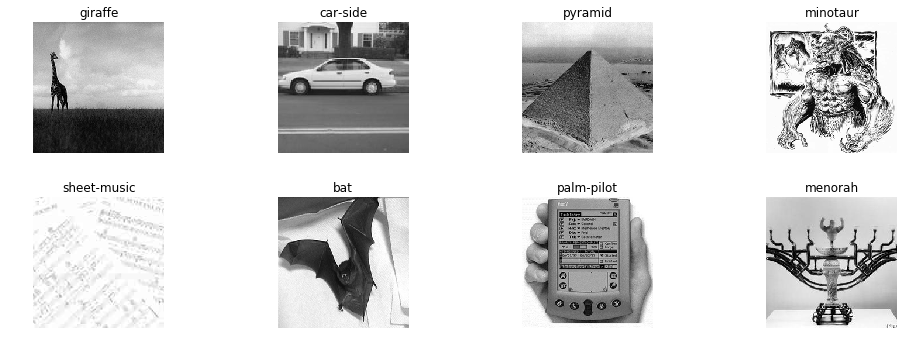

In [20]:
_, axes = plt.subplots(nrows=2, ncols=4, figsize=(14, 5))
axes = axes.flatten()
for i, j in enumerate(to_show):
    axes[i].set_axis_off();
    axes[i].imshow(train_images[j]/255);
    axes[i].set_title(decode[train_targets[j]]);
plt.tight_layout()

# Save

In [21]:
%%time
np.save('train_images.npy', train_images) # size: 7.2 GB
np.save('train_targets.npy', train_targets)

np.save('val_images.npy', val_images) # size: 736 MB
np.save('val_targets.npy', val_targets)

CPU times: user 0 ns, sys: 5.43 s, total: 5.43 s
Wall time: 5.75 s
